In [1]:
import pandas as pd
import numpy as np
import csv
from math import floor
from matplotlib import pyplot as plt
import matplotlib
from li_s_battery_init import inputs
from li_s_battery_init import cathode as cat
from li_s_battery_init import anode as an
from li_s_battery_post import tag_strings
import os
import sys
owd = os.getcwd()


Using cascade
Inputs check
2.482774765849148e-05 3.6427468184473707e-07
5365.519435723896
1.6172090550639133
0.703134371766919
External current = -59.039794123002245
Initialization check


In [2]:
# Function definitions
def get_file_name(find_string, dir_path, **kwargs):
    flag = kwargs.get('flag', None)
    full_list = os.listdir(dir_path)
    if flag:
        file_name = [file for file in full_list if find_string in file]
    else:
        file_name = [file for file in full_list if find_string in file][0]
        
    return file_name

def df_name(file_name_list, file_number):
    file_name = file_name_list[file_number]
    df_name = file_name.split('_')
    return df_name[0]

def read_file(file_name_list):
    df_dict = {}
    for i in np.arange(0, len(file_name_list)):
        name = df_name(file_name_list, i)
        df_dict[name] = pd.read_csv(file_name_list[i])
    return df_dict

def sort_df(SV):
    Vcell = {}
    Capacity = {}
    C_k = {}
    keys = list(SV.keys())
    tags = tag_strings(SV['dch0.1C'])
    for i in np.arange(0, len(SV.keys())):
        offset = i*9
        Crate = keys[i]
        Vcell[Crate] = SV[Crate]['Phi_ed5']
        Capacity[Crate] = SV[Crate]['Time']
        C_k[Crate] = SV[Crate][tags['rho_el']]
    return Vcell, Capacity, C_k

In [5]:
assary_files = get_file_name('.csv', 'Assary Data', flag=1)
kuzmina_files = get_file_name('.csv', 'Kuzmina Data', flag=1)
cascade_files = get_file_name('.csv', 'Cascade Data', flag=1)

In [6]:
os.chdir(owd)
os.chdir('Assary Data')
assary_data = read_file(assary_files)
os.chdir(owd)
os.chdir('Kuzmina Data')
kuzmina_data = read_file(kuzmina_files)
os.chdir(owd)
os.chdir('Cascade Data')
cascade_data = read_file(cascade_files)
os.chdir(owd)

In [7]:
Vcell_assary, Cap_assary, C_k_assary = sort_df(assary_data)
Vcell_kuzmina, Cap_kuzmina, C_k_kuzmina = sort_df(kuzmina_data)
Vcell_cascade, Cap_cascade, C_k_cascade = sort_df(cascade_data)

In [8]:
fs = 20
font = 'Times New Roman'
lw = 2.0
keys = ['dch0.1C', 'dch0.2C', 'dch0.3C', 'dch0.4C', 'dch0.5C', 'dch0.6C', 'dch0.7C',
        'dch0.8C', 'dch0.9C', 'dch1C', 'dch1.1C', 'dch1.2C', 'dch1.3C',
        'dch1.4C', 'dch1.5C',]
tags = tag_strings(assary_data['dch0.1C'])
grad = np.linspace(0, 1, 6)
species_cmap = np.zeros((len(grad),4))
for i, val in enumerate(grad):
    species_cmap[i] = matplotlib.cm.plasma(val)
colormap = plt.cm.get_cmap('plasma')
print(species_cmap)

[[5.03830e-02 2.98030e-02 5.27975e-01 1.00000e+00]
 [4.17642e-01 5.64000e-04 6.58390e-01 1.00000e+00]
 [6.92840e-01 1.65141e-01 5.64522e-01 1.00000e+00]
 [8.81443e-01 3.92529e-01 3.83229e-01 1.00000e+00]
 [9.88260e-01 6.52325e-01 2.11364e-01 1.00000e+00]
 [9.40015e-01 9.75158e-01 1.31326e-01 1.00000e+00]]


## Section 1 plotting cell voltage at various C-rates 

In [ ]:
os.chdir(owd)
os.chdir('Figures/voltage')
for i in np.arange(0, len(keys), 2):
    fig = plt.figure(1)
    ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
    ax.tick_params(direction='in')
    fig.set_size_inches((8., 5.))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname(font)
    print(keys[i])
    #p1, = plt.plot(Cap_assary[keys[i]], Vcell_assary[keys[i]], 'k-', linewidth=lw)
    #p2, = plt.plot(Cap_kuzmina[keys[i]], Vcell_kuzmina[keys[i]], 'r-', linewidth=lw)
    p3, = plt.plot(Cap_cascade[keys[i]], Vcell_cascade[keys[i]], 'b-', linewidth=lw)
    
    plt.xlim((0, 1500))
    plt.ylim((1.8, 2.4))
    fig.savefig('Vcell' + keys[i] + '.png')
os.chdir(owd)

## Plotting polysulfide concentrations at 0.1C

In [ ]:
os.chdir(owd)
os.chdir('Figures/species concentrations')
for i in np.arange(0, len(keys)):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True, num=i)
    ax1.tick_params(direction='in')
    ax2.tick_params(direction='in')
    ax3.tick_params(direction='in')
    fig.set_size_inches((8., 5.))
    
    for tick in ax1.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
        
    for tick in ax2.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    for tick in ax2.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
        
    for tick in ax3.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)
    for tick in ax3.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs-4)
        tick.label1.set_fontname(font)

    for j in np.arange(0, inputs.npoints_cathode):
        offset = j*6
        for k in np.arange(0, 6):
            ax1.plot(Cap_assary[keys[i]], C_k_assary[keys[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            ax2.plot(Cap_kuzmina[keys[i]], C_k_kuzmina[keys[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
            ax3.plot(Cap_cascade[keys[i]], C_k_cascade[keys[i]].iloc[:, k+offset], 
                     linewidth=lw, color=species_cmap[k])
    fig.savefig('C_k_elyte' + keys[i] + '.png')
    fig.legend()
os.chdir(owd)

## Plotting Ragone plots to show stability

In [9]:
Li2S8_max = 0.756
Li2S4_max = 0.0085
Li2S2_max = 0.00695
Li2S_max = 0.0008

Li2S6_max = 0.5*(Li2S8_max + Li2S4_max)
Li2S3_max = 0.5*(Li2S4_max + Li2S2_max)
i_ext_0 = -4.217
i_ext = [i_ext_0, i_ext_0*2, i_ext_0*3, i_ext_0*4, i_ext_0*5, i_ext_0*6, i_ext_0*7, 
         i_ext_0*8, i_ext_0*9, i_ext_0*10, i_ext_0*11, i_ext_0*12, i_ext_0*13,
         i_ext_0*14, i_ext_0*15]
Power_cascade = np.zeros((len(keys)))
E_rec = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    Vcell_cascadei = Vcell_cascade[keys[i]]
    Cap_cascadei = Cap_cascade[keys[i]]
    Vcell_cascade_avg = np.average(Vcell_cascadei)
    Power_cascade[i] = -Vcell_cascade_avg*i_ext[i]*inputs.A_cat/an.m_bat
    E_rec[i] = -Vcell_cascade_avg*Cap_cascadei.iloc[-1]*(cat.m_S_0 + cat.m_S_el)/an.m_bat
    
print(Power_cascade, -E_rec)

[  96.2336907   190.05068013  283.38252773  376.90919228  467.30600891
  559.40670229  651.86424309  745.43850685  834.3528112   928.18095916
 1015.86480774 1107.2374828  1198.07103508 1288.7146257  1382.08442417] [859.31021089 814.08811556 775.9400191  741.67766332 704.61232616
 673.18289557 644.07462071 617.59213383 589.18168969 566.05022207
 540.89063051 519.47939927 499.24801212 480.30868514 463.56560931]


In [10]:
Max_conc = np.zeros((len(keys)))
for i in np.arange(0, len(keys)):
    max1 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat1'])
    max2 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat2'])
    max3 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat3'])
    max4 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat4'])
    max5 = max(C_k_cascade[keys[i]]['rho_S2-(e)_cat5'])
    Max_conc[i] = max(max1, max2, max3, max4, max5)
print(Max_conc)

Max_conc_norm = Max_conc/max(Max_conc)
print(Max_conc_norm)

plasma_custom = matplotlib.cm.plasma(Max_conc_norm)

[1.94825613 2.45233083 2.70646165 2.8310393  2.89373942 2.92598383
 2.94051584 2.92601516 2.88619143 2.82791238 2.75628575 2.67513735
 2.58739108 2.49527836 2.40054605]
[0.66255591 0.83397981 0.9204037  0.96276962 0.98409244 0.99505801
 1.         0.99506866 0.98152555 0.96170622 0.9373477  0.90975104
 0.87991061 0.84858525 0.81636903]


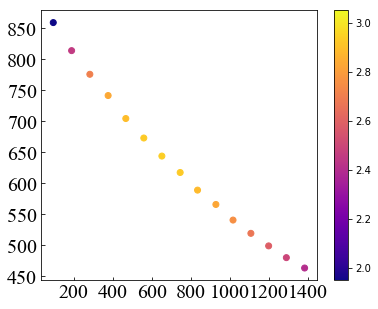

In [11]:
os.chdir(owd)
os.chdir('Figures/ragone plots')
fig = plt.figure(1)
ax = fig.add_axes([0.2, 0.2, 0.6, 0.75])
ax.tick_params(direction='in')
fig.set_size_inches((8., 5.))

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname(font)

p1 = plt.scatter(Power_cascade, -E_rec, c=Max_conc, cmap='plasma', vmin=min(Max_conc), vmax=3.05)
plt.colorbar(p1)
fig.savefig('Ragone.png')
os.chdir(owd)

## Plotting mean polysulfide concentrations (order >=4)

In [ ]:
def plot_meanPS(SV_df, tags, cycle):

#    C_k = SV_df[tags['rho_el'][cathode.i_S8:-2]].copy()
    meanPS = np.zeros([len(SV_df.index), inputs.npoints_cathode])
    for i in np.arange(inputs.npoints_cathode):
        for j in np.arange(len(SV_df.index)):
            offset = i*10
            C_k = SV_df[tags['rho_el'][5+offset:offset+8]].copy()
            meanPS[j, i] = sum(cat.n_S_atoms[5:-2]*C_k.iloc[j, :])/sum(cat.S_atoms_bool[5:-2]*C_k.iloc[j, :])
          
    "Set up your figure"
    fig = plt.figure(2)
    ax = fig.add_axes([0.2,0.2,0.6,0.75])
    fig.set_size_inches((8.,5.0))
    
    "Formatting for the figure:"
    fs = 20     #font size for plots
    lw = 2.0    #line width for plots
#    font = plt.matplotlib.font_manager.FontProperties(family='Times New Roman',size=fs-1)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fs)
        tick.label1.set_fontname('Times New Roman')    
    
    for i in np.arange(inputs.npoints_cathode):
        p1, = plt.plot(SV_df.loc[:, 'Time'], meanPS[:, i], '-', linewidth=lw)
        plt.xlim((0, 1770))
        plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])
        plt.yticks([2, 3, 4, 5, 6, 7, 8])
        plt.ylabel('Cell Voltage [V]', fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)
        plt.xlabel(r'Capacity $[\mathrm{Ah} \hspace{0.5} \mathrm{kg}^{-1}_{\mathrm{sulfur}}]$', fontstyle='normal', fontname='Times new Roman', fontsize=fs+2, labelpad=5.0)
        
    return